In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import CM4Xutils
CM4Xutils.__version__

'0.4.0'

In [3]:
import doralite
import gfdl_utils.core as gu

In [4]:
import xbudget
import xwmb

In [5]:
model = "CM4Xp125"
interval = "2020"
grid = CM4Xutils.load_wmt_grid(model, interval=interval, dmget=True)

Loading CM4Xp125-piControl for interval `2020`.
Issuing dmget command to migrate data to disk. Migration complete.


/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/grid_ufunc.py:836: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


Issuing dmget command to migrate data to disk. Migration complete.


/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/grid_ufunc.py:836: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg
/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/grid_ufunc.py:836: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


Skipping variable average_DT because `cell_methods` attribute not defined.
Skipping variable average_T1 because `cell_methods` attribute not defined.
Skipping variable average_T2 because `cell_methods` attribute not defined.
Skipping variable time_bnds because `cell_methods` attribute not defined.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Loading CM4Xp125-ssp585 for interval `2020`.
Issuing dmget command to migrate data to disk. Migration complete.


/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/grid_ufunc.py:836: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


Issuing dmget command to migrate data to disk. Migration complete.


/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/grid_ufunc.py:836: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg
/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/grid_ufunc.py:836: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


Skipping average_DT because independent of 'X' and 'Y' dims.
Skipping average_T1 because independent of 'X' and 'Y' dims.
Skipping average_T2 because independent of 'X' and 'Y' dims.
Skipping time_bnds because independent of 'X' and 'Y' dims.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Overriding CM4Xp125 grid coordinates from supergrid.
Regridding ice
Skipping average_DT because independent of 'X' and 'Y' dims.
Skipping average_T1 because independent of 'X' and 'Y' dims.
Skipping average_T2 because independent of 'X' and 'Y' dims.
Skipping time_bnds because independent of 'X' and 'Y' dims.
Inferring Z grid coordinate: depth `z_`


/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


In [6]:
grid._ds = CM4Xutils.add_sigma2_coords(grid._ds)

In [7]:
budgets_dict = xbudget.load_preset_budget(model="MOM6_3Donly")
xbudget.collect_budgets(grid, budgets_dict)

/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/grid_ufunc.py:836: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg
/work/hfd/.conda/envs/CM4X/lib/python3.12/site-packages/xgcm/grid_ufunc.py:836: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg


In [8]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    wmb = xwmb.WaterMassBudget(
        grid,
        budgets_dict,
        method="xgcm"
    )
    wmb.mass_budget("sigma2", greater_than=True, default_bins=False, integrate=True, along_section=False)
    wmt = wmb.wmt

In [9]:
%%time
wmt_mean = (wmt.sel(exp="control").mean("time")/1035*1e-6)
wmt_mean.load()

CPU times: user 1h 2min 35s, sys: 48min 49s, total: 1h 51min 25s
Wall time: 45min 33s


<xarray.Dataset> Size: 77MB
Dimensions:                                         (sigma2_l_target: 74,
                                                     sigma2_i_target: 75,
                                                     time_bounds: 61, yh: 1120,
                                                     xh: 1440)
Coordinates: (12/13)
    exp                                             <U7 28B 'control'
  * sigma2_l_target                                 (sigma2_l_target) float64 592B ...
  * sigma2_i_target                                 (sigma2_i_target) float64 600B ...
  * time_bounds                                     (time_bounds) object 488B ...
    geolon                                          (yh, xh) float64 13MB -29...
    lon                                             (yh, xh) float64 13MB -29...
    ...                                              ...
    lat                                             (yh, xh) float64 13MB -82...
    deptho                                          (yh, xh) float32 6MB 0.0 ...
    wet                                             (yh, xh) float32 6MB 0.0 ...
    areacello                                       (yh, xh) float64 13MB 2.6...
  * xh                                              (xh) int64 12kB 0 1 ... 1439
  * yh                                              (yh) int64 9kB 0 1 ... 1119
Data variables: (12/39)
    surface_ocean_flux_advective_negative_rhs_heat  (sigma2_l_target) float64 592B ...
    surface_ocean_flux_advective_negative_rhs_salt  (sigma2_l_target) float64 592B ...
    surface_exchange_flux_heat                      (sigma2_l_target) float64 592B ...
    surface_exchange_flux_salt                      (sigma2_l_target) float64 592B ...
    bottom_flux_heat                                (sigma2_l_target) float64 592B ...
    Eulerian_tendency_heat                          (sigma2_l_target) float64 592B ...
    ...                                              ...
    mass_tendency                                   (sigma2_l_target) float64 592B ...
    dt                                              float64 8B 0.002539
    realized_transformation                         (sigma2_l_target) float64 592B ...
    spurious_numerical_mixing                       (sigma2_l_target) float64 592B ...
    advection_plus_BC                               (sigma2_l_target) float64 592B ...
    diabatic_advection                              (sigma2_l_target) float64 592B ...

In [10]:
def stairs(wmt, var, units="kg", **kwargs):
    da = wmt[var]
    coord = wmt[[c for c in wmt.coords if "l_target" in c][0]]
    coord_bounds = wmt[[c for c in wmt.coords if "i_target" in c][0]]
    l = plt.stairs(da, coord_bounds, **kwargs, orientation="horizontal")
    plt.xlabel(f"mean transformation rate [{units}]")
    return l

(-50.0, 50.0)

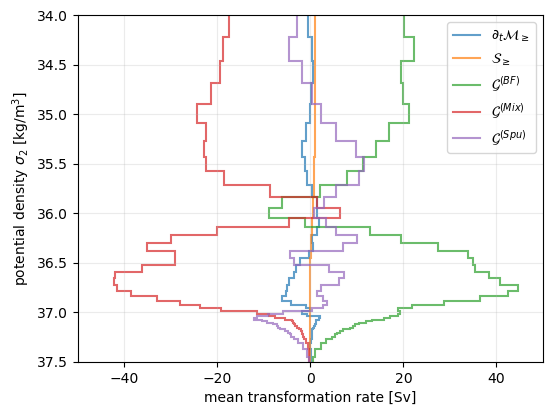

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4.5))

kwargs = {"units":"Sv", "alpha":0.7, "lw":1.5}

stairs(-wmt_mean, 'mass_tendency',             label=r"$\partial_{t} \mathcal{M}_{\geq}$",**kwargs)
stairs( wmt_mean, 'mass_source',               label=r"$\mathcal{S}_{\geq}$",            **kwargs)
stairs( wmt_mean, 'boundary_fluxes',           label=r"$\mathcal{G}^{(BF)}$",      **kwargs)
stairs( wmt_mean, 'diffusion',                 label=r"$\mathcal{G}^{(Mix)}$",     **kwargs)
stairs( wmt_mean, 'spurious_numerical_mixing', label=r"$\mathcal{G}^{(Spu)}$", **kwargs)

plt.legend(loc="upper right")
plt.grid(True, alpha=0.25)
plt.ylabel(r"potential density $\sigma_{2}$ [kg/m$^{3}$]");
plt.ylim(37.5, 34.0);
plt.xlim(-50, 50)